In [1]:
# %matplotlib widget

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from data_io import read_iq_data
from visualisation import PDRPlotter, load_and_plot_pkl_data
from interference_utils import pdr_vs_snr_analysis_parallel
from receiver import ReceiverType, DemodulationType
from demodulation import TEDType

# BLE example

In [2]:
fs = 10e6  # Hz
folder = "data_pdr"
filenames: dict = {"BLE": "BLE_0dBm.dat", "IEEE802154": "802154_0dBm.dat"}  # Open BLE file
receiver_type: ReceiverType = "BLE"
signal_present = (4000, 14000) if receiver_type == "BLE" else (8000, 35000)
iq_samples: np.ndarray = read_iq_data(f"../../capture_nRF/data/new/{filenames[receiver_type]}")

demodulation_type: DemodulationType = "BAND_PASS"
ted_types: list[TEDType] = [
    "MOD_MUELLER_AND_MULLER",
]
snr_range = range(0, 10, 1)
noise_realisations = int(1e4)

In [3]:
pdr = []

for ted in ted_types:
    result = pdr_vs_snr_analysis_parallel(
        iq_samples=iq_samples,
        snr_range=snr_range,
        sample_interval=signal_present,
        fs=fs,
        receiver_type=receiver_type,
        demodulation_type=demodulation_type,
        ted_type=ted,
        noise_realisations=noise_realisations,
    )
    pdr.append(result)
    filename = f"{folder}/{receiver_type}_band_pass_{ted}.pkl"
    with open(filename, "wb") as file:
        pickle.dump(result, file)

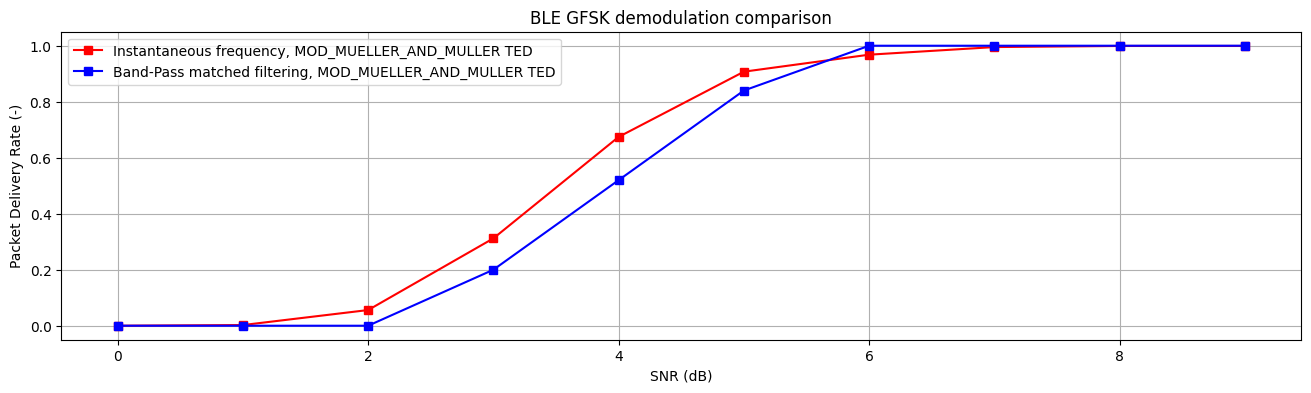

In [4]:
opened_files = []
# Instantaneous frquency
for ted in ted_types:
    with open(f"{folder}/{receiver_type}_inst_freq_MOD_MUELLER_AND_MULLER.pkl", "rb") as f:
        opened_files.append(pickle.load(f))

# Band pass
with open(f"{folder}/{receiver_type}_band_pass_MOD_MUELLER_AND_MULLER.pkl", "rb") as f:
    band_pass = pickle.load(f)

markers = ["o", "s", "D", "^", "v", "<", ">", "p", "*", "X"]
plotter = PDRPlotter()
# Instantaneous frquency
plotter.add_trace(
    opened_files[0],
    f"Instantaneous frequency, {ted_types[0]} TED",
    colour="red",
    linestyle="-",
    marker="s",
)
# Band pass
plotter.add_trace(
    band_pass, f"Band-Pass matched filtering, {'MOD_MUELLER_AND_MULLER'} TED", colour="blue", linestyle="-", marker="s"
)
plotter.plot(title="BLE GFSK demodulation comparison", figsize=(16, 4))